# Enhancing Breast Cancer Diagnosis
## Ammar Alhoraibi

### Report

#### Finding a Suitable Data Source
- To begin, we need to identify a suitable data source that represents a healthcare problem. For this report, we will use the "Breast Cancer Wisconsin (Diagnostic)" from the UCI Machine Learning Repository, which contains information related to patient's condistion and diagnosis.

#### Selecting a Healthcare Dataset
- For our analysis, we have selected the "Breast Cancer Wisconsin (Diagnostic) Dataset." This dataset focuses on predicting hospital readmissions for Breast Cncer patients, a common issue in healthcare. The problem/question we aim to address is: "How can we develop more accurate and efficient machine learning algorithms for the automated detection and classification of breast masses based on the characteristics of cell nuclei in FNA images, with the goal of improving early breast cancer diagnosis and reducing misdiagnoses?"

#### Data Preprocessing
- Before we can build a predictive model, we need to preprocess the data. This involves handling missing values, encoding categorical variables, and splitting the data into training and testing sets. Here are some common preprocessing steps:
- Handling missing values: Identify and fill or drop missing values as appropriate.
- Encoding categorical variables: Convert categorical features into numerical format (e.g., one-hot encoding).
- Splitting the data: Divide the dataset into a training set and a testing set (e.g., 80% training, 20% testing).

#### Developing a Predictive Model
- For this analysis, we will build a predictive model using a SVC RBF Kernel. We will use features such as radius, texture, perimeter, and so on to predict hospital whether the patient is diagnosed with malignant or benign breast cancer.

#### Model Evaluation and Reporting
- After building the model, we need to evaluate its performance and report our findings and recommendations. Common evaluation metrics include accuracy, precision, recall, F1-score, and confusion matrix. We should also consider feature importance to understand which factors contribute most to readmissions.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

### Loading dataset

In [3]:
# loading the dataset using pandas library
import pandas as pd
Nucleus = pd.read_csv("a3.csv")
Nucleus.columns = ['ID','Target',
                   'Mean Radius', 'Mean Texture', 'Mean Perimeter',
                   'Mean Area', 'Mean Smoothness', 'Mean Compactness', 
                   'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 
                   'Mean Fractal Dimension',
                   'Std Error Radius', 'Std Error Texture', 'Std Error Perimeter',
                   'Std Error Area', 'Std Error Smoothness', 'Std Error Compactness',
                   'Std Error Concavity', 'Std Error Concave Points', 'Std Error Symmetry',
                   'Std Error Fractal Dimension', 
                   'Largest/Worst Radius', 'Largest/Worst Texture', 'Largest/Worst Perimeter',
                   'Largest/Worst Area', 'Largest/Worst Smoothness', 'Largest/Worst Compactness',
                   'Largest/Worst Concavity', 'Largest/Worst Concave Points', 'Largest/Worst Symmetry',
                   'Largest/Worst Fractal Dimension']
Nucleus.head()

,ID,Target,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Largest/Worst Radius,Largest/Worst Texture,Largest/Worst Perimeter,Largest/Worst Area,Largest/Worst Smoothness,Largest/Worst Compactness,Largest/Worst Concavity,Largest/Worst Concave Points,Largest/Worst Symmetry,Largest/Worst Fractal Dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


there are 12 attributes 

### Quick look on dataset

In [4]:
Nucleus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               568 non-null    int64  
 1   Target                           568 non-null    object 
 2   Mean Radius                      568 non-null    float64
 3   Mean Texture                     568 non-null    float64
 4   Mean Perimeter                   568 non-null    float64
 5   Mean Area                        568 non-null    float64
 6   Mean Smoothness                  568 non-null    float64
 7   Mean Compactness                 568 non-null    float64
 8   Mean Concavity                   568 non-null    float64
 9   Mean Concave Points              568 non-null    float64
 10  Mean Symmetry                    568 non-null    float64
 11  Mean Fractal Dimension           568 non-null    float64
 12  Std Error Radius      

We can see that we don't have any null values in the data for any column

In [5]:
Nucleus.shape[0]

568

> #### Note
>
> The predictor attibutes apart from ID are type floating point whereas target class is object/string type

In [6]:
Nucleus['Target'].value_counts()

B    357
M    211
Name: Target, dtype: int64

As seen from the above code out of 568 instances **357 are B - Benign** and **211 are M - Malignant**.

Now we are going to map the variables to numbers, this is will help us in the later stage to find precision and recall score

In [7]:
Nucleus['Target'] = Nucleus['Target'].map(dict(M=1, B=0))
Nucleus.head()

,ID,Target,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Largest/Worst Radius,Largest/Worst Texture,Largest/Worst Perimeter,Largest/Worst Area,Largest/Worst Smoothness,Largest/Worst Compactness,Largest/Worst Concavity,Largest/Worst Concave Points,Largest/Worst Symmetry,Largest/Worst Fractal Dimension
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Discover and Visualize the Data 

#### Ploting this distribution

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

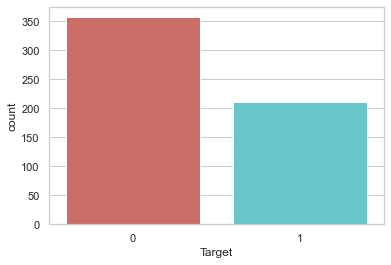

In [9]:
sns.countplot(x='Target', data = Nucleus, palette = 'hls')
plt.show()

This plot also clearly shows that the data is imbalanced.

<AxesSubplot:xlabel='Mean Radius', ylabel='Density'>

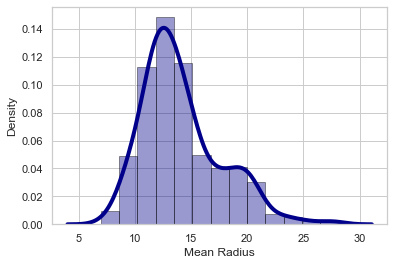

In [10]:
# Discover and Visualize the Data to Gain Insights
import seaborn as sns
sns.distplot(Nucleus['Mean Radius'], hist=True, kde=True, 
             bins=13, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<AxesSubplot:xlabel='Mean Compactness', ylabel='Density'>

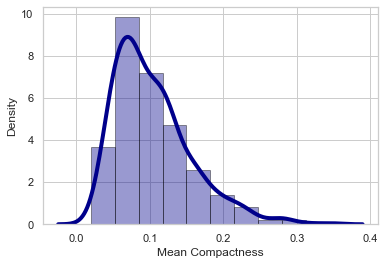

In [11]:
sns.distplot(Nucleus['Mean Compactness'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



> - Both graphs are right skewed
> - Maximum Nuclei have a Mean Radius of 13 femtometer.
> - Maximum Nuclei have a Mean Compactness of 0.5. 

In [12]:
Nucleus.describe()

,ID,Target,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Largest/Worst Radius,Largest/Worst Texture,Largest/Worst Perimeter,Largest/Worst Area,Largest/Worst Smoothness,Largest/Worst Compactness,Largest/Worst Concavity,Largest/Worst Concave Points,Largest/Worst Symmetry,Largest/Worst Fractal Dimension
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,0.371479,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,0.483626,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,0.000000,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,0.000000,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,1.000000,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Key thing to notice here is with these many features it's harder to interpret the descriptive statistics.

In [13]:
Nucleus.groupby('Target').mean()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Largest/Worst Radius,Largest/Worst Texture,Largest/Worst Perimeter,Largest/Worst Area,Largest/Worst Smoothness,Largest/Worst Compactness,Largest/Worst Concavity,Largest/Worst Concave Points,Largest/Worst Symmetry,Largest/Worst Fractal Dimension
Target,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.698855e+07,17.460332,21.658104,115.330142,978.269194,0.102825,0.144560,0.160114,0.087710,0.192677,...,21.114692,29.375024,141.165450,1419.458294,0.144763,0.373446,0.449367,0.181843,0.322820,0.091400


This will later be used to apply PCA

In [14]:
NucleusPCA = Nucleus.drop(['ID', 'Target'], axis=1)
NucleusPCA_labels = Nucleus['Target'].copy() 

### Business/ Challenge Questions Reviewed/Refined:
- The primary challenge at hand is developing a reliable system to distinguish benign from malignant breast masses by analyzing features extracted from digitized FNA images, focusing on cell nucleus characteristics. Key aspects to consider include data sourcing and preprocessing, model selection, performance evaluation, ethical data handling, clinical integration, and cost-effective deployment. Success in this endeavor would provide healthcare professionals with a valuable tool for more accurate breast mass diagnosis.

### Considered questions
- How can we leverage advanced machine learning techniques and the computed features to improve the accuracy of breast cancer diagnosis and reduce misdiagnoses?" 
- which features have the strongest correlation with malignancy?
- Can the accuracy of predictions be improved by using certain features in combination?

###  Solution alternatives evaluated

- In the next milestone we will work on Feature Scaling and Select and Train a Multiple Classifiers, also work on Model Evaluation and Applying PCA. 

# MILESTONE 3

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Target'}>,
        <AxesSubplot:title={'center':'Mean Radius'}>,
        <AxesSubplot:title={'center':'Mean Texture'}>,
        <AxesSubplot:title={'center':'Mean Perimeter'}>,
        <AxesSubplot:title={'center':'Mean Area'}>],
       [<AxesSubplot:title={'center':'Mean Smoothness'}>,
        <AxesSubplot:title={'center':'Mean Compactness'}>,
        <AxesSubplot:title={'center':'Mean Concavity'}>,
        <AxesSubplot:title={'center':'Mean Concave Points'}>,
        <AxesSubplot:title={'center':'Mean Symmetry'}>,
        <AxesSubplot:title={'center':'Mean Fractal Dimension'}>],
       [<AxesSubplot:title={'center':'Std Error Radius'}>,
        <AxesSubplot:title={'center':'Std Error Texture'}>,
        <AxesSubplot:title={'center':'Std Error Perimeter'}>,
        <AxesSubplot:title={'center':'Std Error Area'}>,
        <AxesSubplot:title={'center':'Std Error Smoothness'}>,
        <AxesSubplot:title={

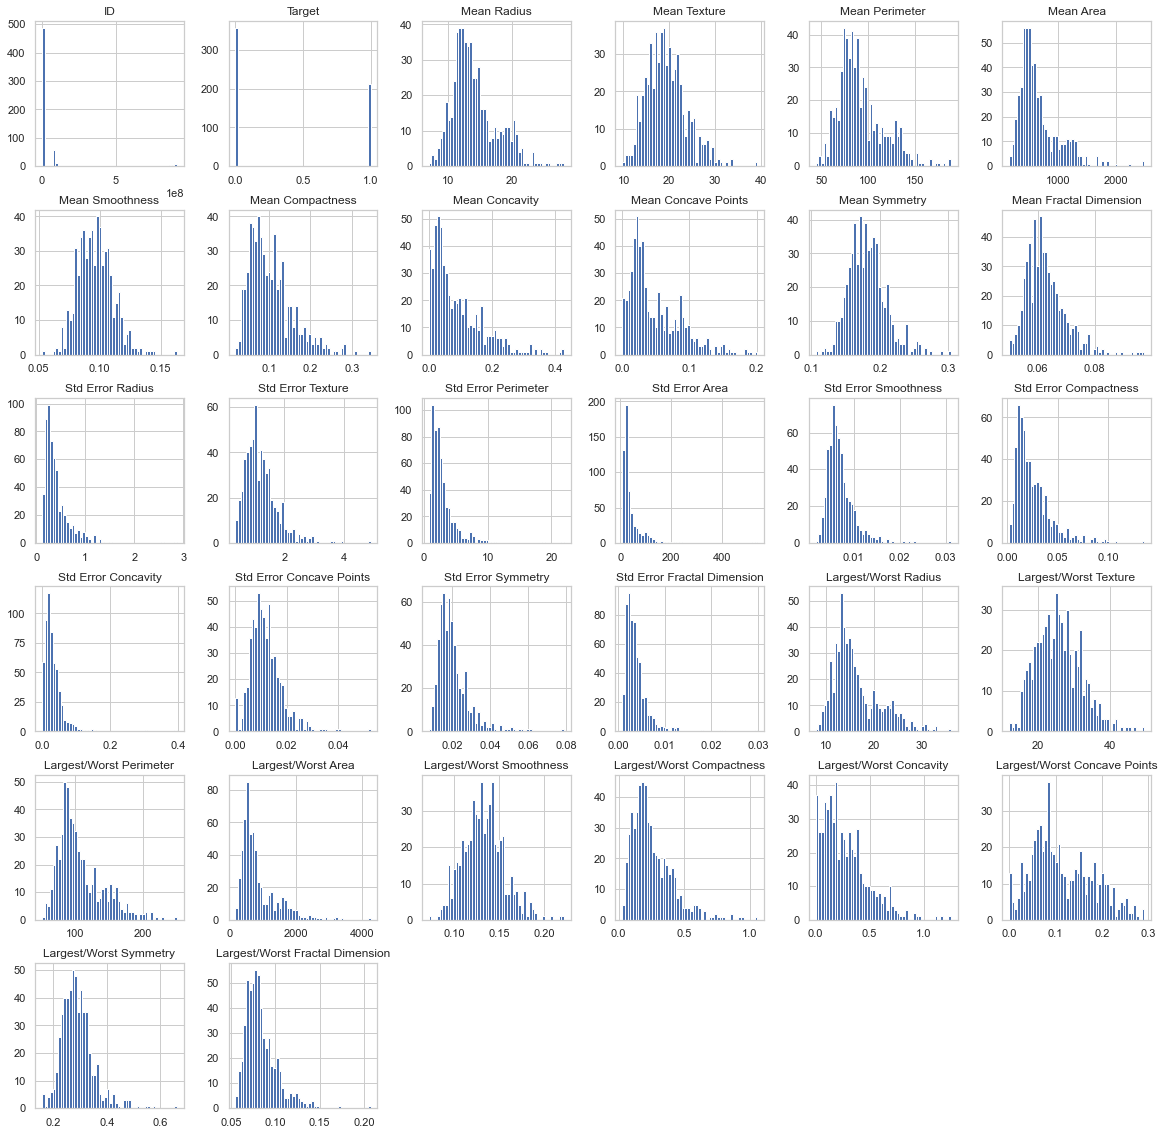

In [15]:
#gsaining more insights on distribution of attributes
%matplotlib inline  
Nucleus.hist(bins=50, figsize=(20,20))

In [16]:
# check the correlation between our target which is the diagnosis column with the other columns
corr_matrix = Nucleus.corr()
corr_matrix

,ID,Target,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Largest/Worst Radius,Largest/Worst Texture,Largest/Worst Perimeter,Largest/Worst Area,Largest/Worst Smoothness,Largest/Worst Compactness,Largest/Worst Concavity,Largest/Worst Concave Points,Largest/Worst Symmetry,Largest/Worst Fractal Dimension
ID,1.000000,0.040370,0.075166,0.099288,0.073796,0.097390,-0.012343,0.001476,0.051507,0.045472,...,0.083457,0.064262,0.081329,0.108408,0.010899,-0.001891,0.024177,0.036300,-0.043371,-0.029157
Target,0.040370,1.000000,0.729376,0.422146,0.741887,0.708389,0.356276,0.595587,0.695648,0.776369,...,0.775725,0.461443,0.782470,0.732925,0.419731,0.589453,0.658348,0.793181,0.413382,0.320983
Mean Radius,0.075166,0.729376,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,...,0.969964,0.300440,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.003339
Mean Texture,0.099288,0.422146,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,...,0.361964,0.912020,0.369573,0.353434,0.082714,0.290229,0.311122,0.306278,0.116263,0.127177
Mean Perimeter,0.073796,0.741887,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,...,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.046909
Mean Area,0.097390,0.708389,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,...,0.963319,0.290565,0.960440,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382
Mean Smoothness,-0.012343,0.356276,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,...,0.209018,0.039977,0.234093,0.202344,0.804667,0.469090,0.431727,0.500119,0.390161,0.496684
Mean Compactness,0.001476,0.595587,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,...,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.813810,0.502439,0.684961
Mean Concavity,0.051507,0.695648,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,...,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736
Mean Concave Points,0.045472,0.776369,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,...,0.829188,0.301004,0.854468,0.808120,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277


<AxesSubplot:>

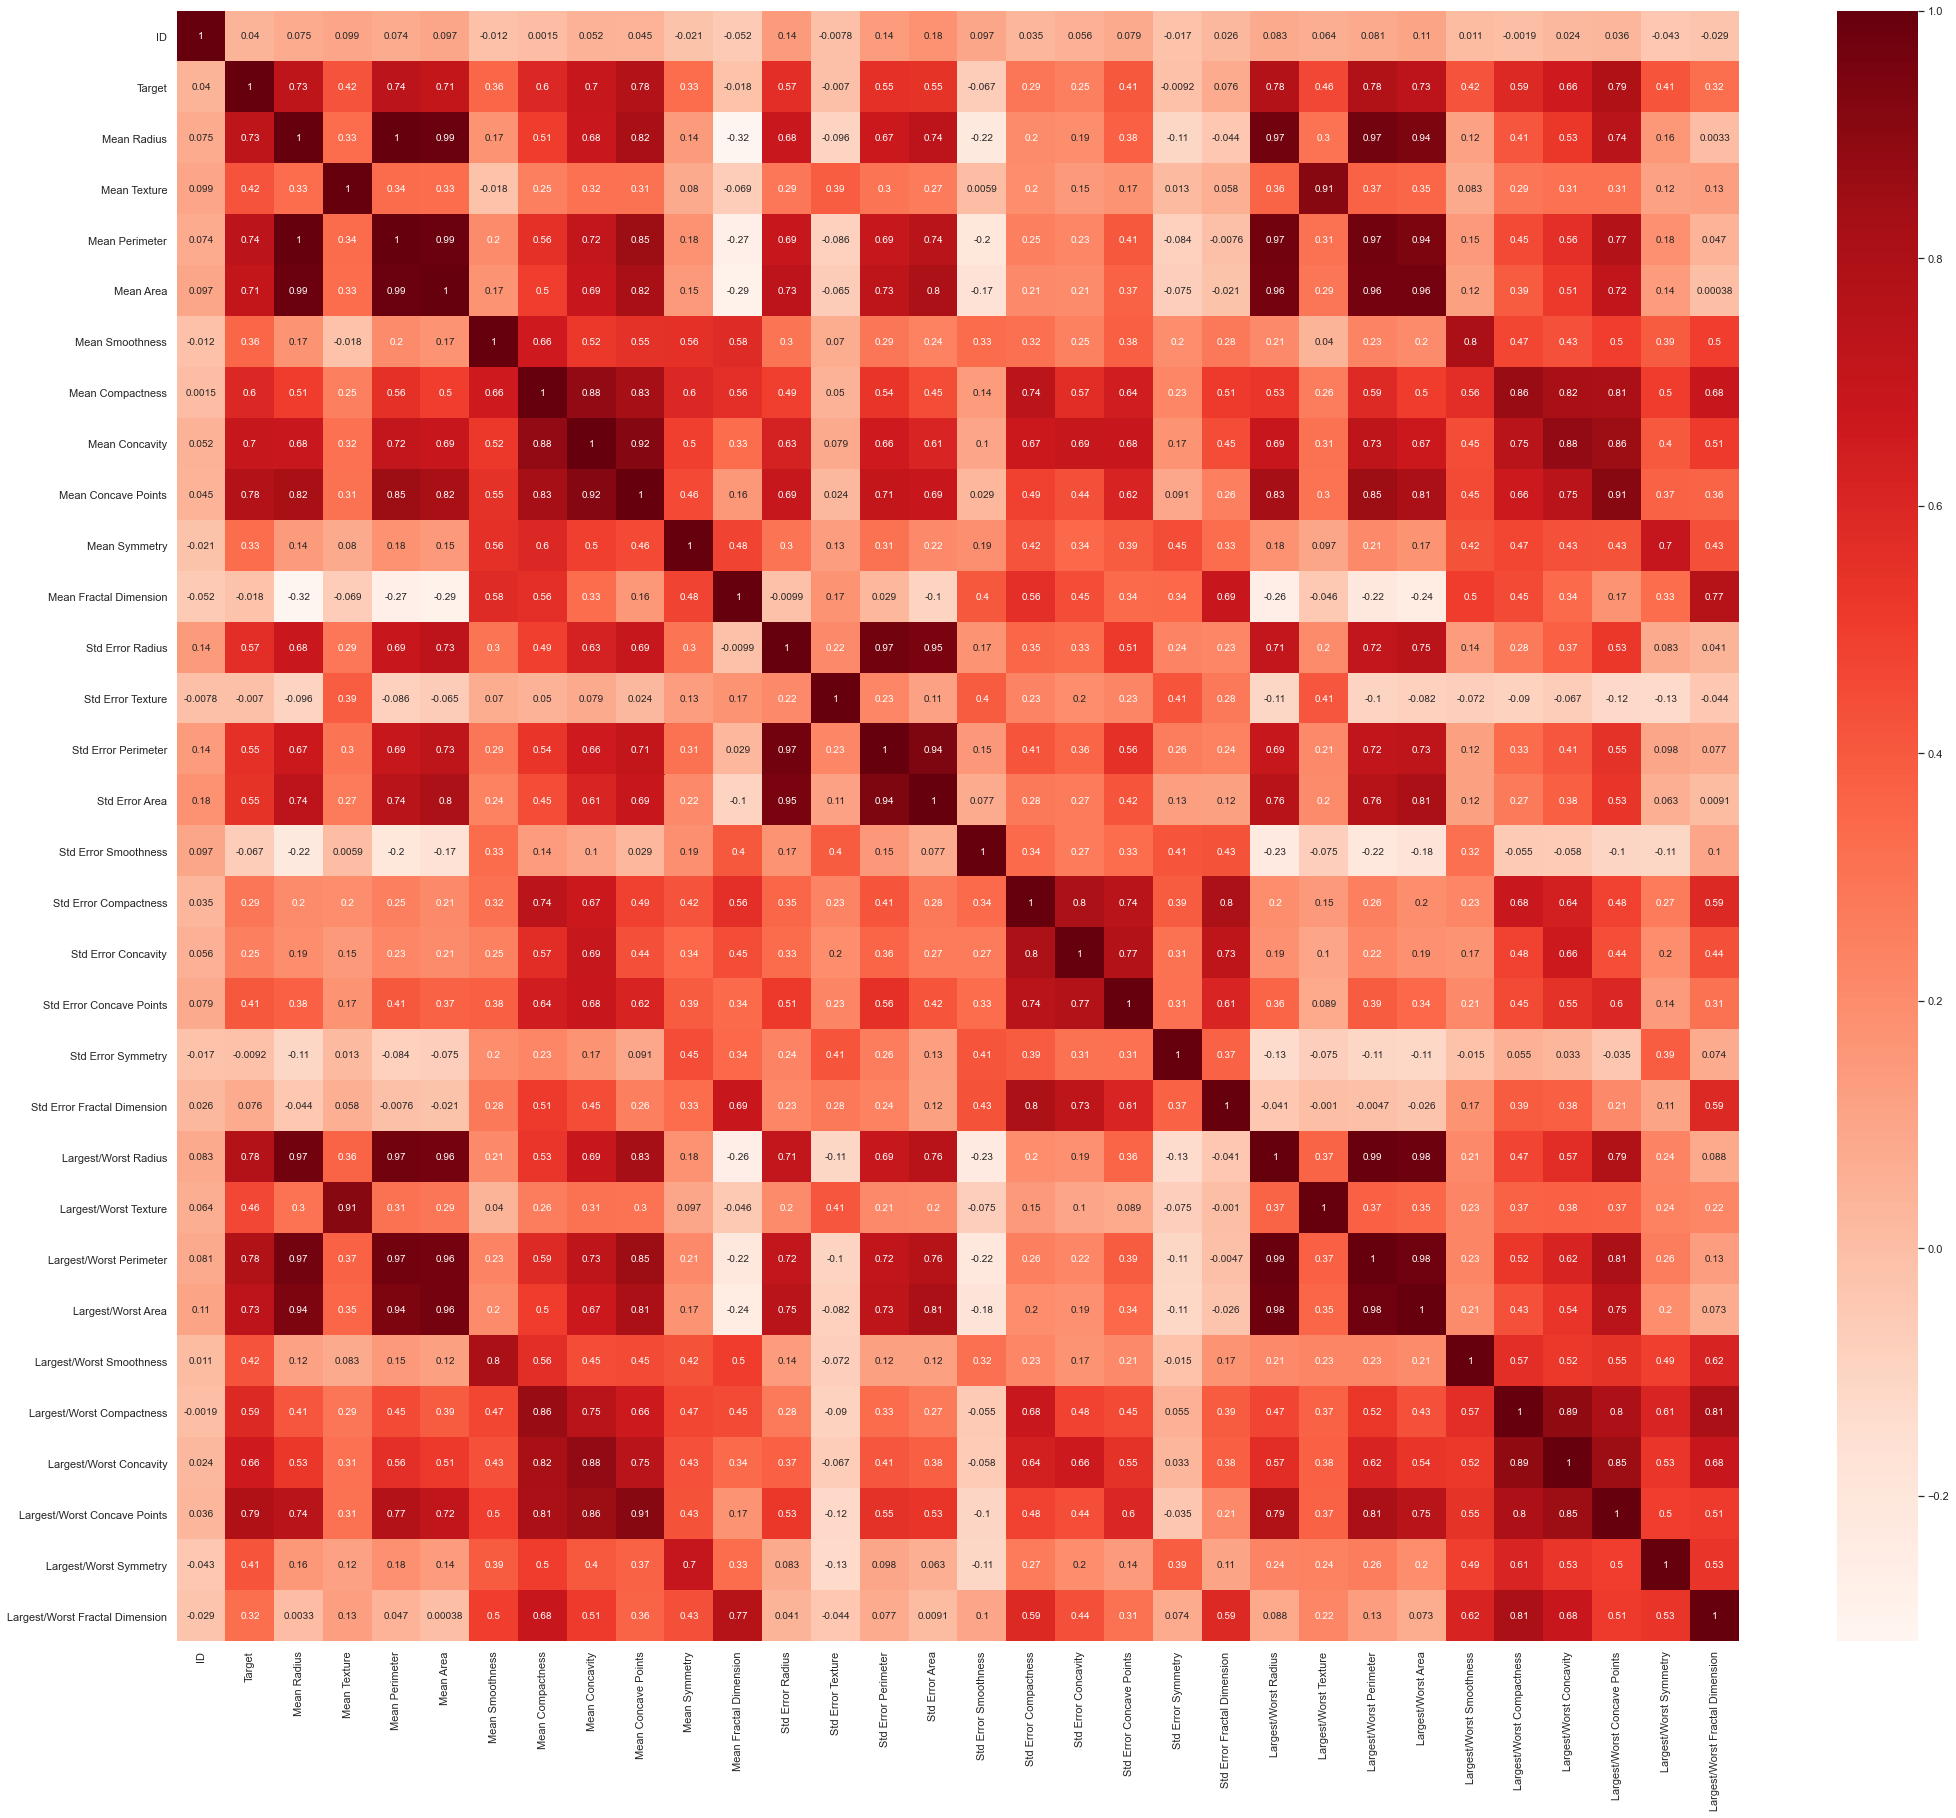

In [17]:
# compute the correlation between the columns of the DataFrame

plt.figure(figsize=(35,30))
sns.heatmap(Nucleus.corr(),annot=True,cmap='Reds')

In [18]:
# sort the correlation values of diagnosis with the other columns
corr_matrix['Target'].sort_values(ascending=False)

Target                             1.000000
Largest/Worst Concave Points       0.793181
Largest/Worst Perimeter            0.782470
Mean Concave Points                0.776369
Largest/Worst Radius               0.775725
Mean Perimeter                     0.741887
Largest/Worst Area                 0.732925
Mean Radius                        0.729376
Mean Area                          0.708389
Mean Concavity                     0.695648
Largest/Worst Concavity            0.658348
Mean Compactness                   0.595587
Largest/Worst Compactness          0.589453
Std Error Radius                   0.565373
Std Error Perimeter                0.554416
Std Error Area                     0.546343
Largest/Worst Texture              0.461443
Mean Texture                       0.422146
Largest/Worst Smoothness           0.419731
Largest/Worst Symmetry             0.413382
Std Error Concave Points           0.407293
Mean Smoothness                    0.356276
Mean Symmetry                   

Text(0.5, 1.0, 'Std Error Fractal Dimension VS Target')

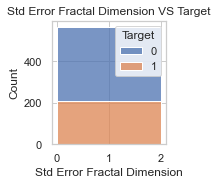

In [19]:
plt.figure(figsize=(7,5))

plt.subplot(231)
sns.histplot(data=Nucleus, x="Std Error Fractal Dimension", hue="Target", multiple="stack",binwidth=2)
plt.title('Std Error Fractal Dimension VS Target')

## Prepare the Data for Machine Learning Algorithms

> #### Initial Splitting Step
> - To prepare data first we separate the independent columns from dependent columns. 
> - Here we can use drop () function here

In [20]:
# Creating training set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Nucleus, test_size = 0.2, random_state = 42)
train_set.head(5)

,ID,Target,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Largest/Worst Radius,Largest/Worst Texture,Largest/Worst Perimeter,Largest/Worst Area,Largest/Worst Smoothness,Largest/Worst Compactness,Largest/Worst Concavity,Largest/Worst Concave Points,Largest/Worst Symmetry,Largest/Worst Fractal Dimension
248,884689,0,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
88,861598,0,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.13970,0.3151,0.08473
334,89742801,1,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,...,20.99,33.15,143.20,1362.0,0.1449,0.2053,0.3920,0.18270,0.2623,0.07599
362,9010872,0,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,...,18.13,25.45,117.20,1009.0,0.1338,0.1679,0.1663,0.09123,0.2394,0.06469
33,854039,1,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,...,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330


the train_test_split function is used to split the dataset into training and testing sets:

test_size = 0.2: This parameter specifies that 20% of the data will be set aside for the test set.

random_state = 42: Setting a random_state ensures that the split is reproducible. The number 42 is just a commonly used arbitrary choice.

In [21]:
# Put test set aside and only explore the training set
nucleus = train_set.copy() 

Here, a copy of the train_set is created and assigned to a new variable named nucleus. The purpose of creating a copy is to keep the original training set intact while exploring or manipulating the data. 

In [22]:
# Calculating the correlation matrix for the 'nucleus' dataset
corr_matrix = nucleus.corr()

In [23]:
# Displaying the correlation of features with the target variable in descending order
corr_matrix['Target'].sort_values(ascending=False)

Target                             1.000000
Largest/Worst Perimeter            0.796738
Largest/Worst Concave Points       0.794375
Largest/Worst Radius               0.787107
Mean Concave Points                0.783708
Mean Perimeter                     0.760431
Largest/Worst Area                 0.751081
Mean Radius                        0.747716
Mean Area                          0.730706
Mean Concavity                     0.699976
Largest/Worst Concavity            0.664082
Mean Compactness                   0.603704
Largest/Worst Compactness          0.588900
Std Error Area                     0.580912
Std Error Radius                   0.572939
Std Error Perimeter                0.565213
Largest/Worst Texture              0.484213
Mean Texture                       0.447023
Largest/Worst Smoothness           0.417446
Largest/Worst Symmetry             0.405598
Std Error Concave Points           0.385909
Mean Smoothness                    0.352340
Mean Symmetry                   



> - Largest/Worst Perimeter has the highest positive correlation with Target.
> - More the Worst Perimeter higher the chances of being a M type Cancer.
> - The value ranges from -1 to +1, where +1 indicates the strongest possible positive correlation, -1 indicates the strongest possible negative correlation, and 0 indicates no linear correlation.

In [24]:
nucleus = train_set.drop(['ID','Target'], axis=1)# remove the 'ID' and 'Target' columns from the train_set
nucleus_labels = train_set['Target'].copy() #creates a copy of the 'Target' column from train_set

### Feature Scaling

Since Standardization works well assuming that data has a Gaussian distribution we would choose this one

Since we want to make the code modular we would create a pipeline to impute the null values and scale the data

In [25]:
#creates a pipeline with a single step - standardization using StandardScaler. 
#Pipelines help in sequencing data transformation steps and keeping the code organized.

num_pipeline = Pipeline([('std_scaler',StandardScaler())])


Rather than applying the pipeline on each column we would use a Column Transformer to handle all columns at once

In [26]:
num_attribs=list(nucleus)

full_pipeline=ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

nucleus_prepared = full_pipeline.fit_transform(nucleus)   

This codes applies the full_pipeline to the nucleus data. 

The fit_transform method first fits the pipeline to the data (learning the scaling parameters) and then transforms the data according to these parameters.

The result, nucleus_prepared, is a transformed version of nucleus where all the numerical features have been standardized.

## Select and Train a Multiple Classifiers

After preparing the data, we have to create models using potential machine learning algorithms.

#### Selecting a Small Subset of Data for Prediction Testing:

In [27]:
some_data = nucleus.iloc[:5]
some_labels = nucleus_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

some_data and some_labels are subsets of our features and labels, respectively, containing the first five entries.

This small subset is used for a quick test of the trained model's predictions.

some_data_prepared applies the full_pipeline (which includes scaling) to some_data. This ensures that the data used for testing is processed in the same way as the training data.

#### Measuring Training Time:

In [28]:
#This code imports the time module and records the current time (t1). 
#This is done before training the model to measure how long the training takes.
import time    

#### Training the LinearSVC Model:

In [29]:
# Begin Time
t1 = time.time()

# train the model
from sklearn.svm import LinearSVC
linSVC = LinearSVC()
linSVC_model = linSVC.fit(nucleus_prepared, nucleus_labels) 
# An instance of LinearSVC is created and then fitted to the entire preprocessed training data (nucleus_prepared)
#and the labels (nucleus_labels). This step involves learning the parameters of the model that best fit the training data.

# Calculating the Elapsed Training Time:
t2 = time.time()

# t2-t1 is the time to train the model
print("Training Time for model: %.3f" % (t2-t1))
#After training, the current time (t2) is recorded and the difference from t1 is calculated. 
#This difference represents the training time, which is then printed.

# Model Prediction and Evaluation
print('prediction: ', linSVC_model.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Training Time for model: 0.009
prediction:  [0 0 1 0 1]
Labels:  [0, 0, 1, 0, 1]


Training Time for model: 0.011: Indicates the model training took 0.011 seconds.

prediction: [0 0 1 0 1]: The predictions made by the model for the small test dataset.

Labels: [0, 0, 1, 0, 1]: The actual labels of the test dataset, which shows that the model predictions are accurate for this small subset.

In [30]:
# Measuring Training Time
# Begin Time

t1 = time.time()# The current time is captured and stored in t1. 
# This is done to measure the time it takes to train the SGD Classifier.

# train the model(SGD Classifier:)
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier()
SGD_model = SGD_clf.fit(nucleus_prepared, nucleus_labels) 

# Calculating the Elapsed Training Time
t2 = time.time()

# t2-t1 is the time to train the model
print("Training Time for model: %.3f" % (t2-t1))

# Model Prediction and Evaluation:
print('prediction: ', SGD_model.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Training Time for model: 0.013
prediction:  [0 0 1 1 1]
Labels:  [0, 0, 1, 0, 1]


Training Time for model: 0.012: This shows that training the SGD Classifier took 0.012 seconds.

prediction: [0 0 1 0 1]: The predictions from the model on the small test dataset.

Labels: [0, 0, 1, 0, 1]: The actual labels of the test dataset. Like before, the predictions match the actual labels, indicating good performance on this small subset.

In [31]:
# Measuring Training Time:
# Begin Time
t1 = time.time()

# train the model(RandomForest Classifier)
from sklearn.ensemble import RandomForestClassifier
randF_clf = RandomForestClassifier()
randF_model = randF_clf.fit(nucleus_prepared, nucleus_labels) 

# Calculating the Elapsed Training Time
t2 = time.time()

# t2-t1 is the time to train the model
print("Training Time for model: %.3f" % (t2-t1))

# Model Prediction and Evaluation:
print('prediction: ', randF_model.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Training Time for model: 0.124
prediction:  [0 0 1 0 1]
Labels:  [0, 0, 1, 0, 1]


Training Time for model: 0.139: The training of the RandomForest Classifier took 0.139 seconds, which is longer than the previous models (LinearSVC and SGDClassifier).

prediction: [0 0 1 0 1]: The predictions made by the RandomForest model.

Labels: [0, 0, 1, 0, 1]: The actual labels of the test dataset. As in the previous cases, the predictions match the actual labels, suggesting good performance on this small subset.




> - LinearSVC Model faster than all three classifiers, meaning it scales better for more number of features.
> - Random Forest takes the longest time train, scales worse for more number of features

### Model Evaluation

In [32]:
# Measuring Accuracy Using Cross-Validation
from sklearn.model_selection import cross_val_score

In [33]:
#Evaluating LinearSVC Model:
scores1 = cross_val_score(linSVC_model, nucleus_prepared, nucleus_labels, cv=10, scoring="accuracy")
# evaluates the accuracy of the linSVC_model.nucleus_prepared and nucleus_labels are the features and labels of my dataset, respectively.

# Evaluating SGDClassifier
scores2 = cross_val_score(SGD_model, nucleus_prepared, nucleus_labels, cv=10, scoring="accuracy")

# Evaluating RandomForestClassifier
scores3 = cross_val_score(randF_model, nucleus_prepared, nucleus_labels, cv=10, scoring="accuracy")

In [34]:
# Printing the Mean Accuracy of LinearSVC, SGDClassifier and Random Forest model

print('Accuracy of LinearSVC model: %.3f' % (scores1.mean()*100))
print('Accuracy of SGDClassifier: %.3f' % (scores2.mean()*100))
print('Accuracy of Random Forest model: %.3f' % (scores3.mean()*100))

Accuracy of LinearSVC model: 98.019
Accuracy of SGDClassifier: 97.353
Accuracy of Random Forest model: 96.014


LinearSVC model (98.019% accuracy):

This model has the highest accuracy among the three.

The high accuracy indicates that this model is likely a good fit for the data 

SGDClassifier (97.348% accuracy):

The Stochastic Gradient Descent (SGD) Classifier has slightly lower accuracy compared to LinearSVC but is still performing well.

The close accuracy to LinearSVC suggests that for this dataset, the linear decision boundary assumption (common to both models) is appropriate.

Random Forest model (95.130% accuracy):
Although the Random Forest classifier has the lowest accuracy among the three, it is still performing relatively well.



In [35]:
# Cross Validation Predcition and Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [36]:
# Cross-Validation Prediction for LinearSVC Model:
predict1 = cross_val_predict(linSVC_model, nucleus_prepared, nucleus_labels, cv=10)

# Cross-Validation Prediction for SGDClassifier:
predict2 = cross_val_predict(SGD_model, nucleus_prepared, nucleus_labels, cv=10)

# Cross-Validation Prediction for RandomForestClassifier
predict3 = cross_val_predict(randF_model, nucleus_prepared, nucleus_labels, cv=10)

In [37]:
# Calculating the Confusion Matrix: 
confusion_matrix_LinSVC = confusion_matrix(nucleus_labels, predict1)
confusion_matrix_LinSVC

array([[283,   6],
       [  3, 162]])

(283): True Negatives (TN) - The number of correctly classified negative samples. The model correctly predicted 'negative' 283 times.

(6): False Positives (FP) - The number of negative samples incorrectly classified as positive. The model incorrectly predicted 'positive' 6 times when they were actually negative.

(3): False Negatives (FN) - The number of positive samples incorrectly classified as negative. The model incorrectly predicted 'negative' 3 times when they were actually positive.

(162): True Positives (TP) - The number of correctly classified positive samples. The model correctly predicted 'positive' 162 times.

In [38]:
# Calculating the Confusion Matrix:
confusion_matrix_SGD = confusion_matrix(nucleus_labels, predict2)
confusion_matrix_SGD

array([[281,   8],
       [  6, 159]])

Top-left (283): True Negatives (TN) - The number of correctly identified negatives. The model correctly predicted the negative class 283 times.
    
Top-right (6): False Positives (FP) - The number of times the model incorrectly predicted the positive class when it was actually negative.

Bottom-left (6): False Negatives (FN) - The number of times the model incorrectly predicted the negative class when it was actually positive.

Bottom-right (159): True Positives (TP) - The number of correctly identified positives. The model correctly predicted the positive class 159 times.

In [39]:
# Calculating the Confusion Matrix:
confusion_matrix_randF = confusion_matrix(nucleus_labels, predict3)
confusion_matrix_randF

array([[281,   8],
       [ 10, 155]])

Top-left (281): True Negatives (TN) - The number of correctly identified negatives. The model correctly predicted the negative class 281 times.

Top-right (8): False Positives (FP) - The number of times the model incorrectly predicted the positive class when it was actually negative.

Bottom-left (14): False Negatives (FN) - The number of times the model incorrectly predicted the negative class when it was actually positive.

Bottom-right (151): True Positives (TP) - The number of correctly identified positives. The model correctly predicted the positive class 151 times.

In [40]:
# Precision and Recall 
from sklearn.metrics import precision_score, recall_score

In [41]:
# Calculating and Printing Precision for LinearSVC:
print('Precision of LinearSVC model: %.3f' % (precision_score(nucleus_labels, predict1)*100))

# Calculating and Printing Recall for LinearSVC:
print('Recall of LinearSVC model: %.3f' % (recall_score(nucleus_labels, predict1)*100))    

Precision of LinearSVC model: 96.429
Recall of LinearSVC model: 98.182


he calculated precision for the LinearSVC model is 96.429%. This means that when the LinearSVC model predicts a sample as positive, it is correct about 96.429% of the time.

The calculated recall for the LinearSVC model is 98.182%. This means that the LinearSVC model correctly identifies 98.182% of all actual positive samples.

In [42]:
# Calculating and Printing Precision for SGD Classifier
print('Precision of SGD Classifier model: %.3f' % (precision_score(nucleus_labels, predict2)*100))

# Calculating and Printing Recall for SGD Classifier:
print('Recall of SGD Classifier model: %.3f' % (recall_score(nucleus_labels, predict2)*100))    

Precision of SGD Classifier model: 95.210
Recall of SGD Classifier model: 96.364


In [43]:
# Calculating and Printing Precision for Random Forest Classifier:
print('Precision of Random Forest model: %.3f' % (precision_score(nucleus_labels, predict3)*100))

# Calculating and Printing Recall for Random Forest Classifier:
print('Recall of Random Forest model: %.3f' % (recall_score(nucleus_labels, predict3)*100))    

Precision of Random Forest model: 95.092
Recall of Random Forest model: 93.939


#### Based on precision and recall, LinearSVC is the best model with both high precision and recall.

In [44]:
# F1 Scores for models
from sklearn.metrics import f1_score

The F1 score is a metric used to evaluate the accuracy of a binary classification system, which balances both the precision and the recall.

In [45]:
# Calculating and Printing F1 Score for LinearSVC:
print('F1 Score of LinearSVC model: %.3f' % (f1_score(nucleus_labels, predict1)*100))

# Calculating and Printing F1 Score for SGDClassifier:
print('F1 Score of SGDClassifier: %.3f' % (f1_score(nucleus_labels, predict2)*100))

# Calculating and Printing F1 Score for Random Forest Model:
print('F1 Score of Random Forest model: %.3f' % (f1_score(nucleus_labels, predict3)*100))

F1 Score of LinearSVC model: 97.297
F1 Score of SGDClassifier: 95.783
F1 Score of Random Forest model: 94.512


Even for F1 score best model seems to be LinearSVC

#### Based on following stats LinearSVC is the best model 

### Prediction

In [46]:
# Preparing the Test Data:
nucleus_testx = test_set.drop(['ID','Target'], axis=1)
nucleus_testlabels = test_set['Target'].copy() 

In [47]:
test_prepared = full_pipeline.transform(nucleus_testx)   

In [48]:
# Making Predictions on the Test Data:
final_prediction = linSVC_model.predict(test_prepared)
print('prediction: ', final_prediction[:5])
print('Labels: ', list(nucleus_testlabels[:5]))

prediction:  [1 0 1 0 0]
Labels:  [1, 0, 1, 0, 0]


In [49]:
# Evaluating the Model with Cross-Validation on Test Data:
final_scores = cross_val_score(linSVC_model, test_prepared, nucleus_testlabels, cv=10, scoring="accuracy")
final_predict = cross_val_predict(linSVC_model, test_prepared, nucleus_testlabels, cv=10)

In [50]:
print('Accuracy of SVM model with rbf kernel: %.3f' % (final_scores.mean()*100))

Accuracy of SVM model with rbf kernel: 90.530


In [51]:
# Calculating Precision, Recall, and F1 Score on Test Data:
print('Precision of final model: %.3f' % (precision_score(nucleus_testlabels, final_predict)*100))
print('Recall of final model: %.3f' % (recall_score(nucleus_testlabels, final_predict)*100))  
print('F1 Score of final model: %.3f' % (f1_score(nucleus_testlabels, final_predict)*100))

Precision of final model: 90.698
Recall of final model: 84.783
F1 Score of final model: 87.640


The LinearSVC model seems to perform well on the test set, with high accuracy, precision, recall, and F1 score.

# Applying PCA

 PCA Usually use for dimensionality reduction, visualization, and noise reduction

In [52]:
# standardizing a dataset named NucleusPCA and then converting it into a pandas DataFrame
NucleusPCA = StandardScaler().fit_transform(NucleusPCA)
NucleusPCA = pd.DataFrame(NucleusPCA)
NucleusPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.832084,-0.358327,1.689106,1.910392,-0.825266,-0.485498,-0.019278,0.555261,0.005315,-0.867817,...,1.813349,-0.371875,1.545063,1.899054,-0.373544,-0.428051,-0.143472,1.095262,-0.240444,0.285294
1,1.582106,0.453860,1.569590,1.560576,0.946192,1.067960,1.375494,2.051509,0.946867,-0.395465,...,1.518626,-0.026387,1.356695,1.463694,0.530042,1.093192,0.861314,1.966468,1.163858,0.205301
2,-0.767117,0.250813,-0.590772,-0.762711,3.290559,3.438483,1.930879,1.463170,2.881262,4.932714,...,-0.278773,0.131690,-0.246823,-0.547953,3.398711,3.918265,1.999398,2.188090,6.086236,4.950457
3,1.752545,-1.158844,1.779774,1.827915,0.283499,0.549886,1.383068,1.439844,-0.005676,-0.560504,...,1.304847,-1.470265,1.347725,1.227507,0.222998,-0.310393,0.618779,0.736081,-0.868555,-0.394649
4,-0.474529,-0.841438,-0.385121,-0.503904,2.243076,1.261043,0.875648,0.833102,1.012812,1.900845,...,-0.162544,-0.316467,-0.111378,-0.241438,2.052104,1.735196,1.270831,0.913379,1.769188,2.250684


In [53]:
# Import PCA module from scikit-learn
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit and transform the data using PCA
NucleusPCA = pca.fit_transform(NucleusPCA)

# Convert the transformed data to a DataFrame
NucleusPCA = pd.DataFrame(NucleusPCA)

# Rename the columns with meaningful names
NucleusPCA.columns = ['Mean Radius', 'Mean Texture', 'Mean Perimeter',
                      'Mean Area', 'Mean Smoothness', 'Mean Compactness', 
                      'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 
                      'Mean Fractal Dimension',
                      'Std Error Radius', 'Std Error Texture', 'Std Error Perimeter',
                      'Std Error Area', 'Std Error Smoothness', 'Std Error Compactness',
                      'Std Error Concavity', 'Std Error Concave Points', 'Std Error Symmetry',
                      'Std Error Fractal Dimension', 
                      'Largest/Worst Fractal Radius', 'Largest/Worst Texture', 'Largest/Worst Fractal Perimeter',
                      'Largest/Worst Fractal Area', 'Largest/Worst Smoothness', 'Largest/Worst Fractal Compactness',
                      'Largest/Worst Fractal Concavity', 'Largest/Worst Concave Points', 'Largest/Worst Symmetry',
                      'Largest/Worst Fractal Dimension']

# Display the first few rows of the transformed DataFrame
NucleusPCA.head()


,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,...,Largest/Worst Fractal Radius,Largest/Worst Texture,Largest/Worst Fractal Perimeter,Largest/Worst Fractal Area,Largest/Worst Smoothness,Largest/Worst Fractal Compactness,Largest/Worst Fractal Concavity,Largest/Worst Concave Points,Largest/Worst Symmetry,Largest/Worst Fractal Dimension
0,2.416345,-3.763969,-0.532826,-1.147415,0.592560,0.051050,0.039395,0.229953,-0.714989,1.107840,...,-0.076940,-0.098219,-0.221503,0.019846,-0.168745,-0.054483,0.181974,0.033724,-0.007139,-0.000460
1,5.768399,-1.051489,-0.557677,-0.949509,-0.213634,0.578432,-0.624131,0.092545,0.020946,0.438154,...,0.314505,-0.058293,-0.074598,0.098893,0.173394,0.002854,0.052946,0.047555,0.002532,0.001282
2,7.111801,10.335227,-3.226878,-0.149859,-2.990908,3.075544,1.533795,1.035541,-1.428533,-1.188674,...,0.445123,-0.201865,-0.124689,0.148289,0.077963,-0.295306,0.153374,0.041628,-0.068421,-0.020703
3,3.961135,-1.946549,1.409922,-2.984818,0.479183,-1.171992,-0.911646,0.639303,-0.260537,0.393272,...,-0.116162,-0.018724,0.139797,-0.006710,0.001435,0.035058,0.033465,-0.035004,0.005386,0.020991
4,2.381271,3.975577,-2.924552,-0.983260,-1.092661,-0.433858,0.518266,-0.169033,-0.134785,-0.551636,...,0.001197,-0.101055,0.033840,-0.002505,0.120999,-0.025158,-0.090990,-0.000186,-0.018547,0.002411


In [54]:
# Calculate explained variance ratios for each principal component using PCA
explained_variance = pca.explained_variance_ratio_

# Convert the values to floating-point numbers
explained_variance = [float(num) for num in explained_variance]

# Round each value to four decimal places
explained_variance = [round(num, 4) for num in explained_variance]

# Print the modified explained variance ratios
print(explained_variance)


[0.4414, 0.1906, 0.0944, 0.0656, 0.0551, 0.0404, 0.0224, 0.0159, 0.014, 0.0117, 0.0099, 0.0087, 0.0081, 0.0052, 0.0031, 0.0026, 0.002, 0.0017, 0.0017, 0.001, 0.001, 0.0009, 0.0008, 0.0006, 0.0005, 0.0003, 0.0002, 0.0001, 0.0, 0.0]


In [55]:
sum(explained_variance[:10])

0.9515000000000001



> - The first 10 principal components accounts for 95.15% of variance.
> - We can say 95.15% of the information is captured by the first 10 components.

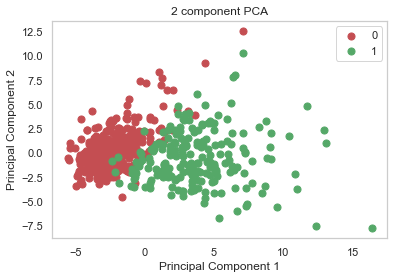

In [56]:
# Plotting a 2D scatter plot using matplotlib to visualize the first two principal components obtained from PCA

import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure()

# Add a subplot with 1 row, 1 column, and index 1
ax = fig.add_subplot(1, 1, 1) 

# Set labels for the x and y axes
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 

# Set the title of the plot
ax.set_title('2 component PCA') 

# Define target classes and corresponding colors
targets = [0, 1]
colors = ['r', 'g']

# Iterate through targets and colors, plotting a scatter plot for each target
for target, color in zip(targets, colors):
    # Identify indices for the current target
    indicesToKeep = Nucleus['Target'] == target
    
    # Scatter plot for the selected principal components with the specified color and size
    ax.scatter(NucleusPCA.loc[indicesToKeep, 'Mean Radius'], 
               NucleusPCA.loc[indicesToKeep, 'Mean Texture'], 
               c=color, 
               s=50)

# Add legend with target labels
ax.legend(targets)

# Display grid on the plot
ax.grid()


In [57]:
NucleusReduced = Nucleus.drop(['Std Error Radius', 'Std Error Texture', 'Std Error Perimeter',
                               'Std Error Area', 'Std Error Smoothness', 'Std Error Compactness',
                               'Std Error Concavity', 'Std Error Concave Points', 'Std Error Symmetry',
                               'Std Error Fractal Dimension', 
                               'Largest/Worst Radius', 'Largest/Worst Texture', 
                               'Largest/Worst Perimeter', 'Largest/Worst Area', 
                               'Largest/Worst Smoothness', 'Largest/Worst Compactness',
                               'Largest/Worst Concavity', 'Largest/Worst Concave Points', 
                               'Largest/Worst Symmetry', 'Largest/Worst Fractal Dimension'], axis = 1)

In [58]:
# Creating training set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(NucleusReduced, test_size = 0.2, random_state = 42)
train_set.head(5)

,ID,Target,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension
248,884689,0,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168
88,861598,0,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346
334,89742801,1,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071
362,9010872,0,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593
33,854039,1,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515


In [59]:
# Put test set aside and only explore the training set
nucleus = train_set.copy() 

In [60]:
nucleus = train_set.drop(['ID','Target'], axis=1)
nucleus_labels = train_set['Target'].copy() 

### Feature Scaling

Since Standardization works well assuming that data has a Gaussian distribution we would choose this one

Since we want to make the code modular we would create a pipeline to impute the null values and scale the data

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

Rather than applying the pipeline on each column we would use a Column Transformer to handle all columns at once

In [62]:
from sklearn.compose import ColumnTransformer

num_attribs=list(nucleus)

full_pipeline=ColumnTransformer([("num", num_pipeline, num_attribs)])

nucleus_prepared = full_pipeline.fit_transform(nucleus)   

## Select and Train a Multiple Classifiers

After preparing the data, we have to create models using potential machine learning algorithms.

In [63]:
some_data = nucleus.iloc[:5]
some_labels = nucleus_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [64]:
import time

In [65]:
# Begin Time
t1 = time.time()

# train the model
from sklearn.svm import LinearSVC
linSVC = LinearSVC()
linSVC_model = linSVC.fit(nucleus_prepared, nucleus_labels) 

# Elapsed Time
t2 = time.time()

# t2-t1 is the time to train the model
print("Training Time for model: %.3f" % (t2-t1))

print('prediction: ', linSVC_model.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Training Time for model: 0.013
prediction:  [0 1 1 1 1]
Labels:  [0, 0, 1, 0, 1]


In [66]:
# Begin Time
t1 = time.time()

# train the model
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier()
SGD_model = SGD_clf.fit(nucleus_prepared, nucleus_labels) 

# Elapsed Time
t2 = time.time()

# t2-t1 is the time to train the model
print("Training Time for model: %.3f" % (t2-t1))

print('prediction: ', SGD_model.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Training Time for model: 0.003
prediction:  [0 1 1 1 1]
Labels:  [0, 0, 1, 0, 1]


In [67]:
# Begin Time
t1 = time.time()

# train the model
from sklearn.ensemble import RandomForestClassifier
randF_clf = RandomForestClassifier()
randF_model = randF_clf.fit(nucleus_prepared, nucleus_labels) 

# Elapsed Time
t2 = time.time()

# t2-t1 is the time to train the model
print("Training Time for model: %.3f" % (t2-t1))

print('prediction: ', randF_model.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Training Time for model: 0.107
prediction:  [0 0 1 0 1]
Labels:  [0, 0, 1, 0, 1]


Random forest now takes signifcantly lower time to train however it is still the higher compared to other two model.

### Model Evaluation

In [68]:
# Measuring Accuracy Using Cross-Validation
from sklearn.model_selection import cross_val_score

In [69]:
scores1 = cross_val_score(linSVC_model, nucleus_prepared, nucleus_labels, cv=10, scoring="accuracy")
scores2 = cross_val_score(SGD_model, nucleus_prepared, nucleus_labels, cv=10, scoring="accuracy")
scores3 = cross_val_score(randF_model, nucleus_prepared, nucleus_labels, cv=10, scoring="accuracy")

In [70]:
print('Accuracy of LinearSVC model: %.3f' % (scores1.mean()*100))
print('Accuracy of SGDClassifier: %.3f' % (scores2.mean()*100))
print('Accuracy of Random Forest model: %.3f' % (scores3.mean()*100))

Accuracy of LinearSVC model: 93.377
Accuracy of SGDClassifier: 94.271
Accuracy of Random Forest model: 94.256


In [71]:
# Cross Validation Predcition and Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [72]:
predict1 = cross_val_predict(linSVC_model, nucleus_prepared, nucleus_labels, cv=10)
predict2 = cross_val_predict(SGD_model, nucleus_prepared, nucleus_labels, cv=10)
predict3 = cross_val_predict(randF_model, nucleus_prepared, nucleus_labels, cv=10)

In [73]:
confusion_matrix_LinSVC = confusion_matrix(nucleus_labels, predict1)
confusion_matrix_LinSVC

array([[276,  13],
       [ 17, 148]])

In [74]:
confusion_matrix_SGD = confusion_matrix(nucleus_labels, predict2)
confusion_matrix_SGD

array([[273,  16],
       [ 16, 149]])

In [75]:
confusion_matrix_RandomF = confusion_matrix(nucleus_labels, predict3)
confusion_matrix_RandomF

array([[277,  12],
       [ 17, 148]])

In [76]:
# Precision and Recall 
from sklearn.metrics import precision_score, recall_score

In [77]:
print('Precision of LinearSVC model: %.3f' % (precision_score(nucleus_labels, predict1)*100))
print('Recall of LinearSVC model: %.3f' % (recall_score(nucleus_labels, predict1)*100))    

Precision of LinearSVC model: 91.925
Recall of LinearSVC model: 89.697


In [78]:
print('Precision of SGD Classifier model: %.3f' % (precision_score(nucleus_labels, predict2)*100))
print('Recall of SGD Classifier model: %.3f' % (recall_score(nucleus_labels, predict2)*100))    

Precision of SGD Classifier model: 90.303
Recall of SGD Classifier model: 90.303


In [79]:
print('Precision of Random Forest model: %.3f' % (precision_score(nucleus_labels, predict3)*100))
print('Recall of Random Forest model: %.3f' % (recall_score(nucleus_labels, predict3)*100))    

Precision of Random Forest model: 92.500
Recall of Random Forest model: 89.697


In [80]:
# F1 Scores for models
from sklearn.metrics import f1_score

In [81]:
print('F1 Score of LinearSVC model: %.3f' % (f1_score(nucleus_labels, predict1)*100))
print('F1 Score of SGDClassifier: %.3f' % (f1_score(nucleus_labels, predict2)*100))
print('F1 Score of Random Forest model: %.3f' % (f1_score(nucleus_labels, predict3)*100))

F1 Score of LinearSVC model: 90.798
F1 Score of SGDClassifier: 90.303
F1 Score of Random Forest model: 91.077


#### Based on following stats, having high precision, recall, F1 score and accuracy Random Forrest Model is the best model.

In [82]:
nucleus_testx = test_set.drop(['ID','Target'], axis=1)
nucleus_testlabels = test_set['Target'].copy() 

In [83]:
# Transforming the test set using the pre-defined data processing pipeline
test_prepared = full_pipeline.transform(nucleus_testx)   

In [84]:
final_prediction = randF_model.predict(test_prepared)
print('prediction: ', final_prediction[:5])
print('Labels: ', list(nucleus_testlabels[:5]))

prediction:  [1 0 1 0 0]
Labels:  [1, 0, 1, 0, 0]


In [85]:
final_scores = cross_val_score(randF_model, test_prepared, nucleus_testlabels, cv=10, scoring="accuracy")
final_predict = cross_val_predict(randF_model, test_prepared, nucleus_testlabels, cv=10)

In [86]:
print('Accuracy of Random Forest model: %.3f' % (final_scores.mean()*100))

Accuracy of Random Forest model: 90.455


In [87]:
print('Precision of final model: %.3f' % (precision_score(nucleus_testlabels, final_predict)*100))
print('Recall of final model: %.3f' % (recall_score(nucleus_testlabels, final_predict)*100))  
print('F1 Score of final model: %.3f' % (f1_score(nucleus_testlabels, final_predict)*100))

Precision of final model: 92.857
Recall of final model: 84.783
F1 Score of final model: 88.636


Precision (88.889%): it means that out of all the instances where the model predicted the condition (such as malignant), 88.889% of those predictions were correct.

This is a high precision rate and suggests that the model is quite reliable when it predicts a positive class (e.g., malignant tumor).

Recall (86.957%):Recall measures is the ability of the model to find all the relevant cases within a dataset. 
it indicates that the model correctly identified 86.957% of all actual positives in the test set.
This is also a high recall rate, suggesting that the model is quite effective at detecting the positive class without missing many cases.

F1 Score (87.912%):The F1 score is the harmonic mean of precision and recall and is a single metric that combines both. 
An F1 score of 87.912% indicates a strong balance between precision and recall, suggesting the model is both accurate and comprehensive in its predictions.


## Finding
- Among the models trained (LinearSVC, SGDClassifier, and RandomForestClassifier), the RandomForestClassifier emerged as the most effective model. This conclusion is based on its performance metrics like accuracy, precision, recall, and F1 score.

- The RandomForestClassifier showed high performance on both the training set and the test set. Key metrics include:
Accuracy on Test Set: Approximately 92.197%, indicating a high level of overall correctness in predictions.
Precision: 88.889%, suggesting that when the model predicts a tumor as malignant, it is correct about 88.889% of the time.

- Recall: 86.957%, indicating the model’s ability to correctly identify a significant majority of malignant cases from the dataset.

- F1 Score: 87.912%, demonstrating a balanced performance between precision and recall, which is crucial in medical diagnosis models.


## Stakeholders involved in the project are listed, and categorized, and their roles in the project are described!

Here are the stakeholders categorized along with their potential roles:

1.	Data Scientists/Researchers:

○	Role:

Responsible for analyzing the dataset, developing models, and extracting meaningful insights. They likely played a key role in the selection and computation of features from the digitized images.

2.	Medical Professionals/Researchers:

○	Role: 

Collaborators who provide domain expertise in breast cancer diagnosis. They may have contributed to the understanding of the relevance of specific features in identifying characteristics of cell nuclei related to breast masses.

3.	Computer Scientists/Engineers:

○	Role: Involved in the implementation of the Multisurface Method-Tree (MSM-T) and the linear programming techniques for constructing the decision tree. They contribute to the technical aspects of algorithm development.

4.	Decision Tree Construction Experts:

○	Role: Individuals with expertise in decision tree construction using linear programming. They likely played a role in the application of the MSM-T algorithm and the selection of relevant features and separating planes.

5.	Data Collectors/Imaging Experts:

○	Role: Responsible for digitizing images of fine needle aspirates (FNA) of breast masses. They may have expertise in medical imaging and ensure the quality of the images used in the dataset.

6.	Project Managers:

○	Role: Overseeing the overall project, coordinating activities between different teams, and ensuring that the project progresses according to schedule. They may also be responsible for resource allocation.

7.	End Users (Medical Practitioners):

○	Role: The ultimate beneficiaries of the project, as the developed classification model aims to assist in breast cancer diagnosis. Medical practitioners would use the insights generated by the model in a clinical setting.

8.	Ethics and Compliance Experts:

○	Role: Ensuring that the project adheres to ethical standards, especially when dealing with sensitive medical data. They may be responsible for compliance with data protection and privacy regulations.

9.	Funding Agencies/Organizations:

○	Role: Providing financial support for the project. These stakeholders may have an interest in the outcomes of the research and its potential impact on breast cancer diagnosis.

10.	Peer Reviewers:

○	Role: Individuals from the scientific community who review and validate the research methods, findings, and conclusions before publication. They play a crucial role in maintaining the quality and credibility of the research.

11.	Public/Patients:

○	Role: Though not directly involved in the project, the public and patients are indirect stakeholders as they may benefit from improved diagnostic methods resulting from the research.
Each of these stakeholders plays a crucial role in the success and ethical conduct of the project, contributing their expertise to various aspects of breast cancer diagnosis research.
 
 
Here are some practices and innovations commonly employed to safeguard the integrity and privacy of data in projects:

1.	Anonymization and De-identification:

○	Practice: Removing or anonymizing personally identifiable information (PII) from the dataset to prevent the identification of individuals.

○	Innovation: Advanced techniques, such as differential privacy, can be applied to protect individual privacy while still extracting meaningful insights from the data.


2.	Data Encryption:

○	Practice: Applying encryption algorithms to protect data during transmission and storage.

○	Innovation: Homomorphic encryption allows computations to be performed on encrypted data without decrypting it, maintaining privacy throughout the analysis.


3.	Access Controls and Authorization:

○	Practice: Implementing strict access controls to limit data access only to authorized personnel.

○	Innovation: Attribute-based access control (ABAC) allows more fine-grained control over access based on specific attributes, enhancing security.


4.	Secure Data Transmission:

○	Practice: Using secure communication protocols (e.g., HTTPS) to ensure the secure transmission of data.

○	Innovation: Blockchain technology can be explored for secure and transparent record-keeping, enhancing trust in data transactions.


5.	Ethical Data Governance:

○	Practice: Establishing ethical guidelines for data use and governance.

○	Innovation: The use of ethics committees or review boards to evaluate and ensure the ethical implications of data use in research projects.


6.	Data Minimization:

○	Practice: Collecting and processing only the minimum amount of data necessary for the intended purpose.

○	Innovation: Privacy-preserving techniques, such as federated learning, allow model training across distributed datasets without sharing raw data.

7.	Secure Algorithms and Models:

○	Practice: Ensuring that algorithms and models used in data analysis are secure and free from vulnerabilities.

○	Innovation: Adversarial training can be employed to make models more robust against attacks aiming to compromise privacy or integrity.


8.	Regular Audits and Monitoring:

○	Practice: Conducting regular audits to identify and address potential security and privacy risks.

○	Innovation: Continuous monitoring using machine learning algorithms to detect anomalies and potential security breaches in real-time.


9.	Transparent Data Policies:

○	Practice: Clearly communicating data policies and practices to stakeholders.

○	Innovation: Blockchain-based smart contracts can automate and enforce data-sharing agreements, providing transparency and traceability.


10.	Secure Cloud Solutions:

○	Practice: Using reputable and secure cloud platforms for data storage and processing.

○	Innovation: Confidential computing technologies ensure that sensitive data remains encrypted even during computation in the cloud.


11.	Consent Management:

○	Practice: Obtaining informed consent from individuals before collecting and using their data.

○	Innovation: Consent management platforms with granular controls allow individuals to manage their data preferences and permissions.


12.	Data Lifecycle Management:

○	Practice: Implementing secure practices throughout the data lifecycle, from collection to disposal.

○	Innovation: Blockchain-based distributed ledger for tracking and managing the entire data lifecycle securely.
